# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

## Student Name: SANDRA RUIZ  11/27/2024

## My Link: https://github.com/S572396/ruiz.mod6-web-scraping/tree/master 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

#### Introduction: This repo will work with url "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
#### Sentences, words, and text will be analyzed with filtering by tokens and lemmas and viewing scores. 
#### Histograms for the scores of tokens and lemmas will be created.

In [8]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).


!pip install matplotlib

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# List installed packages
!pip list

print('All prereqs installed.')



Package            Version
------------------ ------------
annotated-types    0.7.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
executing          2.1.0
fonttools          4.55.0
html5lib           1.1
idna               3.10
ipykernel          6.29.5
ipython            8.29.0
jedi               0.19.2
Jinja2             3.1.4
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murmur

#### Create a file to veiw all sentences to aid visually

In [42]:
import requests
from bs4 import BeautifulSoup
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# URL of the article provided
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the HTML content
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    exit()

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the text content from the article
text_content = soup.get_text().strip()

# Process the text with spaCy to split it into sentences
doc = nlp(text_content)

# Split the content into sentences using spaCy's sentence tokenizer
sentences = [sent.text.strip() for sent in doc.sents if sent.text.strip()]

# Write the sentences to a text file with UTF-8 encoding
with open("sentences_list.txt", "w", encoding="utf-8") as file:
    for idx, sentence in enumerate(sentences, 1):
        file.write(f"Sentence {idx}: {sentence}\n")

# If written print statement
print("Sentences have been written to 'sentences_list.txt'.")





Sentences have been written to 'sentences_list.txt'.


#### Question 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [39]:
##Question 1 Answer


import requests
from bs4 import BeautifulSoup
import pickle

# URL of the article provided
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# fetch the HTML content
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    exit()

# Parse the HTML with BeautifulSoup (optional, 
soup = BeautifulSoup(html_content, "html.parser")

# Create and move HTML to a .pkl file
with open("article_html.pkl", "wb") as file:
    pickle.dump(html_content, file)

print("HTML content has been successfully saved to article_html.pkl.")










HTML content has been successfully saved to article_html.pkl.


#### Question 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [ ]:
## Question 2 Answer

import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Get the text content of the article
text_content = soup.get_text()

# To print the first 500 characters with tight spacing
tight_text = " ".join(text_content.split())

# Print the first 500 characters
print(tight_text[:500])



How Laser Headlights Work | Hackaday Skip to content Hackaday Primary Menu Home Blog Hackaday.io Tindie Hackaday Prize Submit About Search for: March 27, 2021 How Laser Headlights Work 130 Comments by: Lewin Day March 22, 2021 When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers


#### Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [21]:
## Question 3 Answer

#### python -m spacy download en_core_web_sm to virtual environment first

import pickle
import spacy
from collections import Counter

# Load the HTML content from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Get the text content of the article
text_content = soup.get_text()

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the text through spaCy pipeline
doc = nlp(text_content)

# Filter the tokens: Remove unnecessary whitespace and change to lowercase
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# To Count the frequency of each token
token_frequencies = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_frequencies.most_common(5)

# Print the most common tokens and the frequencies
print("Most Frequent Tokens (lowercase):")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")


Most Frequent Tokens (lowercase):
comment: 136
march: 133
2021: 133
says: 132
report: 130


#### Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
## Question 4 Answer

import pickle
import spacy
from collections import Counter

# Load the HTML from the .pkl file
with open("article_html.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML 
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Get the text content 
text_content = soup.get_text()

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the text through spaCy pipeline
doc = nlp(text_content)

# Filter out unnecessary stopwords, space and get lemmas in lowercase
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each lemma
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the most common lemmas and frequencies
print("Most Frequent Lemmas (lowercase):")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")


Most Frequent Lemmas (lowercase):
comment: 157
say: 134
march: 133
2021: 133
report: 130


#### Question 5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [ ]:
## Queston 5 Answer:

import spacy
from collections import Counter
import re

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Using the first sentence for analysis
sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind."

# Process the text through spaCy pipeline
doc = nlp(sentence)

# Filter out unnecessary stopwords,whitespace, and get lemmas and tokens in lowercase
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each token and lemma
token_frequencies = Counter(filtered_tokens)
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most common tokens and lemmas
most_common_tokens = token_frequencies.most_common(5)
most_common_lemmas = lemma_frequencies.most_common(5)

# Extract the list of interesting tokens and lemmas
interesting_tokens = [token for token, _ in most_common_tokens]
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]

# Define the method to score a sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence and filter out unwanted elements
    doc = nlp(sentence)
    sentence_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting tokens appear in the sentence
    matching_tokens = sum(1 for token in sentence_tokens if token in interesting_tokens)
    
    # Calculate the score (number of matching tokens / total number of words)
    return matching_tokens / len(sentence_tokens) if sentence_tokens else 0

# Define the method to score a sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence and filter out unwanted elements
    doc = nlp(sentence)
    sentence_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting lemmas appear in the sentence
    matching_lemmas = sum(1 for lemma in sentence_lemmas if lemma in interesting_lemmas)
    
    # Calculate the score (number of matching lemmas / total number of words)
    return matching_lemmas / len(sentence_lemmas) if sentence_lemmas else 0

# Get the score for the sentence by token and by lemma using the interesting tokens and lemmas
token_score = score_sentence_by_token(sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

# Print the scores for the sentence
print(f"Sentence: {sentence}")
print(f"Most common tokens: {most_common_tokens}")
print(f"Most common lemmas: {most_common_lemmas}")
print(f"Score by Token for the sentence: {token_score}")
print(f"Score by Lemma for the sentence: {lemma_score}")



Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Most common tokens: [('think', 1), ('onward', 1), ('march', 1), ('automotive', 1), ('technology', 1)]
Most common lemmas: [('think', 1), ('onward', 1), ('march', 1), ('automotive', 1), ('technology', 1)]
Score by Token for the sentence: 0.5
Score by Lemma for the sentence: 0.5


#### 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

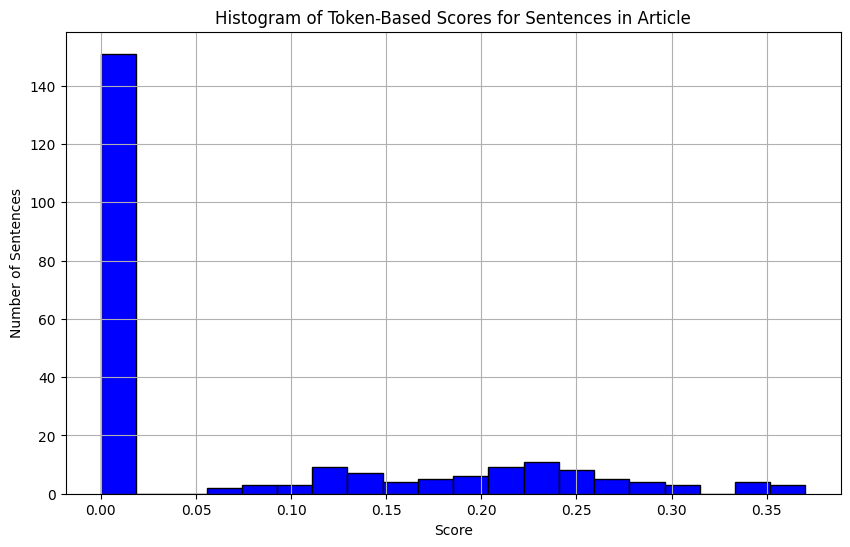

In [ ]:
## Question 6 Answer:

import spacy
import requests
import matplotlib.pyplot as plt
from collections import Counter
from bs4 import BeautifulSoup
import re

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Fetch the article's HTML content from the URL
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Get the text content of the article 
text_content = soup.get_text().strip()

# Process the text through spaCy pipeline
doc = nlp(text_content)

# Filter out unecessary words, whitespace, and get lemmas and tokens in lowercase
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each token
token_frequencies = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_frequencies.most_common(5)

# Extract the list of interesting tokens
interesting_tokens = [token for token, _ in most_common_tokens]

# Define the method to score a sentence by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Tokenize the sentence and filter out unwanted elements
    doc = nlp(sentence)
    sentence_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting tokens appear in the sentence
    matching_tokens = sum(1 for token in sentence_tokens if token in interesting_tokens)
    
    # Calculate the score (number of matching tokens / total number of words)
    return matching_tokens / len(sentence_tokens) if sentence_tokens else 0

# Extract all sentences from the text content
sentences = text_content.split(". ")

# Initialize a list to store the token scores for each sentence
sentence_scores = []

# Calculate the token score for each sentence
for sentence in sentences:
    # Clean up the sentence to remove any leading/trailing whitespace
    sentence = sentence.strip()
    
    # Get the token score for the sentence
    score = score_sentence_by_token(sentence, interesting_tokens)
    
    # Append the score to the list
    sentence_scores.append(score)

# Write the list of sentence scores to a new text file
with open("scores_list.txt", "w") as file:
    file.write("Token-Based Scores for Each Sentence:\n")
    for idx, score in enumerate(sentence_scores, 1):
        file.write(f"Sentence {idx}: {score}\n")

# Plot the histogram of the sentence token scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Token-Based Scores for Sentences in Article')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.grid(True)
plt.show()

### Comment to question after the code:
### The most common range of scores form the histogram are between 0.0 and 0.1







#### Question 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

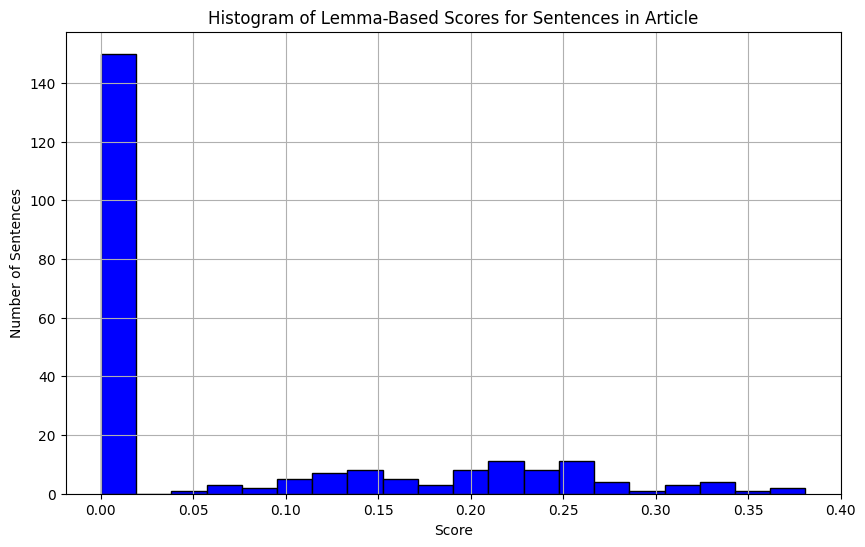

In [4]:
## Question 7 Answer

import spacy
import requests
import matplotlib.pyplot as plt
from collections import Counter
from bs4 import BeautifulSoup

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Fetch the article's HTML content from the URL
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Get the text content of the article
text_content = soup.get_text().strip()

# Process the text through spaCy pipeline
doc = nlp(text_content)

# Filter out unnecessary words, whitespace, and get lemmas in lowercase
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each lemma
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Extract the list of interesting lemmas
interesting_lemmas = [lemma for lemma, _ in most_common_lemmas]

       
# Define the method to score a sentence by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Tokenize the sentence and filter out unwanted elements
    doc = nlp(sentence)
    sentence_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    
    # Count how many of the interesting lemmas appear in the sentence
    matching_lemmas = sum(1 for lemma in sentence_lemmas if lemma in interesting_lemmas)
    
    # Calculate the score (number of matching lemmas / total number of words)
    return matching_lemmas / len(sentence_lemmas) if sentence_lemmas else 0

# Extract all sentences from the text content
sentences = text_content.split(". ")

# Initialize a list to store the token scores for each sentence
sentence_scores = []

# Calculate the lemma score for each sentence
for sentence in sentences:
    # Clean up the sentence to remove any leading/trailing whitespace
    sentence = sentence.strip()
    
    # Get the token score for the sentence
    score = score_sentence_by_lemma(sentence, interesting_lemmas)
    
    # Append the score to the list
    sentence_scores.append(score)  

# Write the list of sentence scores to a new text file
with open("scores_list.lemmas.txt", "w") as file:
    file.write("Lemma-Based Scores for Each Sentence:\n")
    for idx, score in enumerate(sentence_scores, 1):  
        file.write(f"Sentence {idx}: {score}\n")

# Plot the histogram of the Lemmas scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Lemma-Based Scores for Sentences in Article')
plt.xlabel('Score')
plt.ylabel('Number of Sentences')
plt.grid(True)
plt.show()



### Comment to question after the code:
### The most common range of scores form the histogram are between 0.0 and 0.2





#### Quesiton 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

##### Question 8 Answer:
##### We Would change the code to use the word NOUN so that it only filters by nouns. This would elimate any adjectives,verbs, pronouns.
##### the not token.is_stop and not token.is_punct, not token.is_space will remove stop words, not needed punctuation and remove white space.
##### Example below:

filtered_lemmas = [token.lemma_.lower() for token in doc 
                   if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and not token.is_space]


In [6]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 417535 bytes to web-scraping.html
